In [22]:
import numpy as np
import cv2
import os
import scipy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
dataset_dir = 'data/'
mat_files = sorted([file for file in os.listdir(dataset_dir) if file.endswith('.mat')])
mat_files

# Specify inspection sequence
idx = 4
mat_data = scipy.io.loadmat(os.path.join(dataset_dir, mat_files[idx]))
image_sequence = np.float32(mat_data["imageArray"])
h, w, sequence_size = image_sequence.shape[0], image_sequence.shape[1], image_sequence.shape[2]

In [24]:
from scipy.signal import medfilt

def apply_median(pixel_signal):
    return medfilt(pixel_signal, kernel_size=3)

h, w, sequence_size = image_sequence.shape
imageMatrix = image_sequence.reshape(h * w, sequence_size)
imageMatrix = imageMatrix[:, 12:]

imageMatrix = np.apply_along_axis(apply_median, axis=1, arr=imageMatrix)

In [25]:
min_vals = imageMatrix.min(axis=0, keepdims=True)
max_vals = imageMatrix.max(axis=0, keepdims=True)
normalized_data = (imageMatrix - min_vals) / (max_vals - min_vals + 1e-8)

In [26]:
sequence_size = imageMatrix.shape[-1]
poly_degree = 4
time_array = np.arange(1, sequence_size + 1)
coeffs = np.polyfit(time_array, normalized_data.T, poly_degree)
coeffs = coeffs.T

coeffs = coeffs.reshape(h, w, poly_degree+1)
coeffs = [cv2.normalize(coeffs[:, :, i], None, 0, 1, cv2.NORM_MINMAX) for i in range(poly_degree+1)]

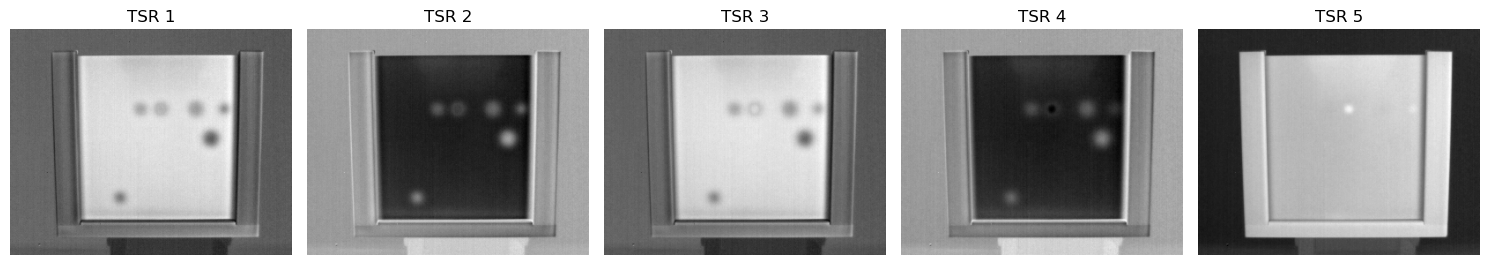

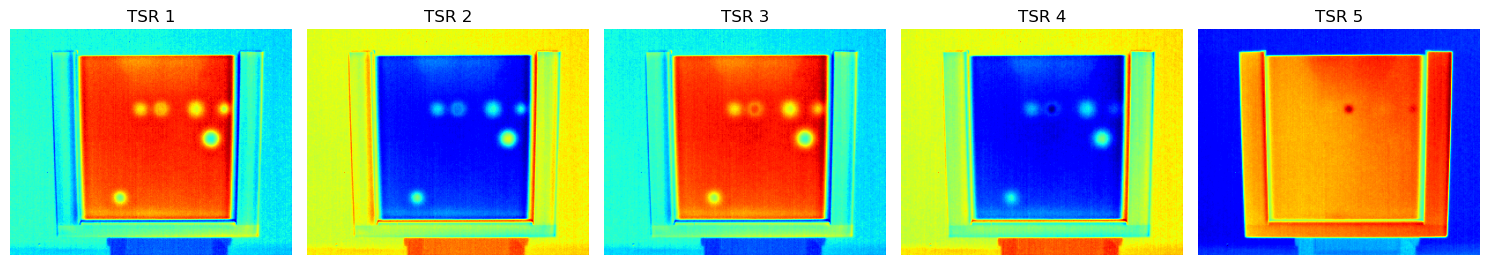

In [27]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(coeffs[i], cmap='gray')
    ax.set_title(f'TSR {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(coeffs[i], cmap='jet')
    ax.set_title(f'TSR {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()